# SPIKE
## presentation
### *SPIKE* a collaborative development for a FT-spectroscopy processing program.
- FT: NMR FTICR-MS Orbitrap-MS
- collaborative effort
    - open source
    - CASC4DE is part of the effort
- many high end features required for FTICR - in particular 2D-FTICR
    - denoising
    - hierarchical data-sets, internally compressed
    - fast processing, using multiprocessor set-up (either desktop or mainframe)
    - GPU enhanced computation

### more a "library" than a interactive program
- natural interface is python, GUI is jupyter
- mostly developper documentation, still few examples but we're working on it

## installation
- pip install spike-py
- https://bitbucket.org/delsuc/spike

## Documentation
is a *work in progress*  - many possible progresses indeed !

try: [software.casc4de.eu/spike/spikedoc](http://software.casc4de.eu/spike/spikedoc/index.html)

## Organisation

In [33]:
ls /Users/mad/spike/spike

Algo/               Miscellaneous/      __init__.py         v1/
Display/            NPKConfigParser.py  __pycache__/        version.py
FTICR.py            NPKData.py          dev_setup.py        version_rev.py
FTMS.py             NPKError.py         plugins/
File/               Orbitrap.py         processing.py
Interactive/        Tests.py            util/


main files:

- NPKData.py : where the `NPKData` object is defined (see below)
- FTMS.py, Orbitrap.py , FTICR.py : files defining MS spectrometry
- Files : file formats and importer
- plugins : use it to write your own
- Interactive : set of jupyter interactive tools
- Algo : main mathematial algorithm
- processing.py : for the processing of 2D FTICR data-sets


# Running the program

simply `import spike`

`%matplotlib notebook` allows a very convenient graphic environment

In [1]:
%matplotlib inline
import spike


          SPIKE
    Version     : 0.99.6
    Date        : 12-04-2019
    Revision Id : 405
*** Importing  << zoom3D >> Failed ***
plugins loaded:
Bruker_NMR_FT,  Bucketing,  FTMS_calib,  Fitter,  Linear_prediction,  PALMA,  Peaks,  apmin,  bcorr,  bokeh_display,  fastclean,  gaussenh,  pg_sane,  rem_ridge,  sane,  sg,  test,  urQRd,  wavelet, 

spike.plugins.report() for a short description of each plugins
spike.plugins.report('module_name') for complete documentation on one plugin


In [2]:
spike.plugins.report()

Bruker_NMR_FT : This plugin implement the set of Fourier Transform used for NMR
    implements: ft_sim(),  ft_seq(),  ft_tppi(),  ft_sh(),  ft_sh_tppi(),  ft_phase_modu(),  ft_n_p(),  bruker_corr(),  bk_corr(),  bruker_proc_phase(),  bk_xf2p(),  bk_pk(),  conv_n_p(),  bk_wdw(),  bk_ftF2(),  bk_ftF1(),  bk_xf2(),  bk_xf1(),  bk_xfb(), 
Bucketing : A set of tools for computing bucketing for 1D and 2D NMR spectra
    implements: bucket1d(),  bucket2d(), 
FTMS_calib : A utility for calibration of MS experiments
    implements: set_calib(),  calib(),  display_calib(), 
Fitter : set of function for Peak fitter
    implements: simulate(),  fit(),  display_fit(), 
Linear_prediction : plugin for the Linear Prediction algos into NPKDATA
    implements: lpext(), 
PALMA : complete DOSY processing, using the PALMA algorithm
    implements: palma(),  do_palma(),  prepare_palma(),  calibdosy(), 
Peaks : set of function for Peak detections and display - 1D and 2D
    implements: pp(),  peakpick(),  ce

# organisation
every thing is organized around the `NPKData` object

It contains
- binary
- 1 (or more) axis
- parameters
- peaks

actually `import spike` does not do much, it simply starts the environment, you need to import selectively the needed tools:

In [3]:
from spike.NPKData import NPKData

## Importers
importers allow to directly create a NPKData from a manufacturer file

In [4]:
from spike.File import Solarix
from spike.File import Apex

In [5]:
ls files/FTICR-Files/

080617-insulin_2M_IRMPD_MSMS_000001.d/ ESI_pos_Ubiquitin_000006.d/
080617-insulin_2M_MS_000001.d/         README.txt


we can directly import the Bruker transient

In [6]:
d = Apex.Import_1D('files/FTICR-Files/ESI_pos_Ubiquitin_000006.d/')

`d` is a `NPKData` object - it has *many* methods attached:

In [7]:
dir(d)

['__add__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__isub__',
 '__le__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__pos__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__weakref__',
 '_absmax',
 '_chsize1d',
 '_chsize2d',
 '_chsize3d',
 '_extract1d',
 '_extract2d',
 '_extract3d',
 '_fft_nD',
 '_ghm',
 '_grfreq',
 '_grmass',
 '_gspecwidth',
 '_gunits',
 '_phase_old',
 '_report',
 '_shm',
 '_srfreq',
 '_srmass',
 '_sspecwidth',
 '_sunits',
 'abs',
 'absmax',
 'adapt_size',
 'add',
 'addbase',
 'addfreq',
 'addnoise',
 'apmin',
 'apod_apply',
 'apod_em',
 'apod_gm',
 'apod_sin',
 'apod_sq_sin',
 'apod_tm',
 'apply_process',
 'axes',
 'axis1',
 'bcorr

many have documentation attached

try

In [8]:
d.apod_sin?

or

In [9]:
d.apod_sin(->tab_key)

SyntaxError: invalid syntax (<ipython-input-9-2385a2b621bd>, line 1)

many objects have a `report()` method attached

In [10]:
d.report()

'1D data-set\nAxis F1 :FT-ICR report axis at 625.000000 kHz,  4194304 real points,  from physical mz =  294.830   to m/z = 3000.000  R max (M=400) = 3091537\ndata-set is real'

show by default within jupyter:

In [11]:
d

1D data-set
Axis F1 :FT-ICR report axis at 625.000000 kHz,  4194304 real points,  from physical mz =  294.830   to m/z = 3000.000  R max (M=400) = 3091537
data-set is real

we can display it:

1D data-set
Axis F1 :FT-ICR report axis at 625.000000 kHz,  4194304 real points,  from physical mz =  294.830   to m/z = 3000.000  R max (M=400) = 3091537
data-set is real

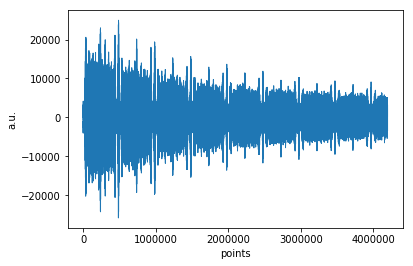

In [12]:
d.display()

we can process it - every processing command actually modifies the data

In [ ]:
d.rfft()
d.display()

# chained operations
all actions on `NPKData` can be chained, and all return a  `NPKData`

so you can write:

1D data-set
Axis F1 :FT-ICR report axis at 625.000000 kHz,  8388608 real points,  from physical mz =  294.830   to m/z = 3000.000  R max (M=400) = 6183075
data-set is real

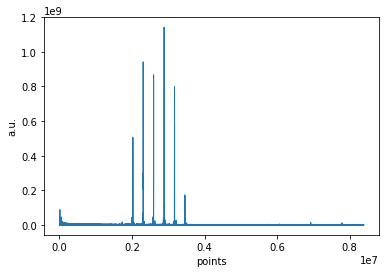

In [13]:
d = Apex.Import_1D('files/FTICR-Files/ESI_pos_Ubiquitin_000006.d/')  # import and create
d.hamming()   # apodisation
d.zf(4)       #
d.rfft()      # Real Fourier Transform
d.modulus()   # take the modulus
d.display()   # and display

or equivalently:

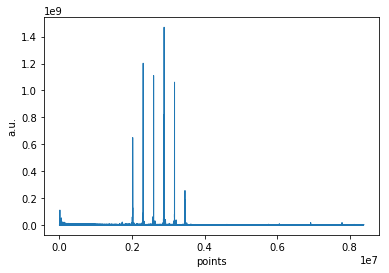

In [14]:
d = Apex.Import_1D('files/FTICR-Files/ESI_pos_Ubiquitin_000006.d/').kaiser(3).zf(4).rfft().modulus().display()

here above, the data set is created and displayed

# unit
a data-set as a unit which is used for display and selecting zones

1D data-set
Axis F1 :FT-ICR report axis at 625.000000 kHz,  8388608 real points,  from physical mz =  294.830   to m/z = 3000.000  R max (M=400) = 6183075
data-set is real

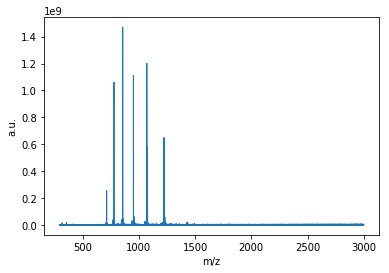

In [15]:
d.set_unit('m/z').display()

1D data-set
Axis F1 :FT-ICR report axis at 625.000000 kHz,  8388608 real points,  from physical mz =  294.830   to m/z = 3000.000  R max (M=400) = 6183075
data-set is real

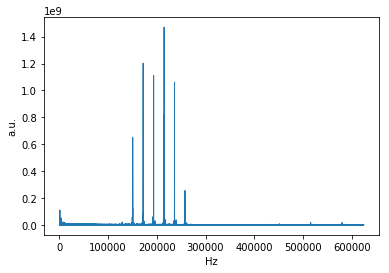

In [16]:
d.set_unit('Hz').display()

# objects

Spectral objects are organized around 3 main blocks

- the `buffer` a numpy array that contains the data
- the axis - here `axis1` (`axis1` and `axis2`in 2D) that contains all relevent information on the organisation of the binary data
- the `params`: a dictionay that hold the information gathered on the experiment while importing - depends on the importer

In [17]:
d.buffer

array([594555.13458623, 967182.39771525, 381022.96160441, ...,
       250568.84396881, 206916.97203318, 126478.0549788 ])

In [18]:
d.axis1

In [19]:
d.axis1.report()

'FT-ICR report axis at 625.000000 kHz,  8388608 real points,  from physical mz =  294.830   to m/z = 3000.000  R max (M=400) = 6183075'

In [20]:
d.params

{'AMS_ActiveExclusion': '0',
 'AMS_BasePeak': '0',
 'AMS_ChargeStateTolerance': '0.0',
 'AMS_CollisionalActivationEnabled': '1',
 'AMS_DynamicExclusion': '0',
 'AMS_EXCL_Masses': '&lt;masslistarray&gt;&lt;masslist starttime=&quot;0.0&quot;&gt;&lt;/masslist&gt;&lt;/masslistarray&gt;',
 'AMS_EnergyFile': '\t\t1: 0.027   17.044\t\t2: 0.0386  -3.5576\t\t3: 0.0291  -1.0453\t\t4: 0.0291  -1.0453\t\t5: 0.0291  -1.0453\t\t6: 0.0291  -1.0453\t\t',
 'AMS_ExcludeAfter': '1',
 'AMS_FixedCollisionVoltage': '-16.0',
 'AMS_FixedCollisionVoltageEnabled': '1',
 'AMS_FractionatedFIA': '0',
 'AMS_FragmentationMode': '0',
 'AMS_INCL_Masses': '&lt;masslistarray&gt;&lt;masslist starttime=&quot;0.0&quot;&gt;&lt;/masslist&gt;&lt;/masslistarray&gt;',
 'AMS_IsolationEnabled': '0',
 'AMS_MSMSBoostEnabled': '0',
 'AMS_MSMSDuration': '4.0',
 'AMS_MassAccuracy': '20.0',
 'AMS_MaxNumParentIons': '1',
 'AMS_MaxThreshold': '1.0E38',
 'AMS_MinThreshold': '0.0',
 'AMS_PreferMultiplyCharged': '1',
 'AMS_Priority_Masses':

In [21]:
d.params['EXC_low']   # note that the content is a string !

'294.82916'

# Conversion
among other things, the axis object knows how to convert units.

For instance a FTICR axis unit can be chosen among `points` `Hz` and `m/z`. The transient knows also `sec`.

there is a set of transformation functions, all called `x_to_y` where `x_` and `_y` are chosen from the possible units

`i h mz s` for points, Hz m/z and sec respectively.

In [22]:
print(d.axis1.itomz(100000))
print(d.axis1.mztoi(1234.5))
print(d.axis1.mztoh(432.1))
print(d.axis1.htoi(123456))

24715.58393028199
2003358.8688803117
426447.21224740177
1656998.1852672


the *current* unit can be set:

and there are function to convert to and from current unit, using the letter c,
but only `ctoi()` and `itoc()` are defined for the moment

In [28]:
# either
d.set_unit('Hz')  # can be chained
#
d.unit = 'm/z'    # can not be chained
print(d.axis1.itomz(1234567))
print(d.axis1.itoc(1234567))
print(d.axis1.ctoi(2003.2))

2003.2080336460783
2003.2080336460783
1234571.951386626


## complex vs real
The axis object also knows about the complex/real state of the dataset.

In fact the buffer that contains the binary data is always a real numpy buffer.
A flag called `itype` (for historical reasons) tels whether the data is real (`itype=0`) or complex (`itype=1`), and the program handles every thing accordingly.

so the size of the axis (the number of points along that axis) is either given as the number of values ( `.size`) or as the number of *numbers* (`.cpxsize`) which will be halved in the case of a coplex axis:

In [48]:
print(d.axis1.itype, d.axis1.cpxsize, d.axis1.size)
d.axis1.report()

0 8388608 8388608


'FT-ICR report axis at 625.000000 kHz,  8388608 real points,  from physical mz =  294.830   to m/z = 3000.000  R max (M=400) = 6183075'

In [49]:
d.axis1.itype = 1   # can actually be forced - BE CAREFULL -
print(d.axis1.itype, d.axis1.cpxsize, d.axis1.size)
d.axis1.report()

1 4194304 8388608


'FT-ICR report axis at 625.000000 kHz,  4194304 complex pairs,  from physical mz =  294.830   to m/z = 3000.000  R max (M=400) = 6183075'

# Calibration
conversion from points to Hz, and from Hz to m/z requires calibration

from points to Hz is fully determined by the sampling of the axis

from Hz to m/z depends on the calibration constants $A$ $B$ and $C$

with the following law:

$$
Hz = \frac{A}{m/z} - B + \frac{C}{(m/z)^2}
$$

A, B, and C are estimated from the acquisition files at import time.

In [29]:
print(d.axis1.calibA, d.axis1.calibB, d.axis1.calibC)

184270017.83361462 5.039161102310875 0.0


an interactive tool is proposed to recalibrate from a set of reference peaks.

# 2D

## Datasets
2D datasets are not so different,

- the buffer is a 2D numpy array
- there are 2 axes: `axis1` for the $F1$ (vertical) axis and `axis2` for the $F2$ (horizontal) axis

However, the tools for handling them are quite different

The files are store in a `HDF5` format (a standard format for scientific hierarchical large data-sets), and are called `*.msh5`
These files contains all the data, the definition of the axes, the parameters, etc...
The spectrum are internally compressed (this is not possible for the transient files).

After processing, the spectrum is stored in a multiresolution, hierarchical manner. These files are usually called `*_mr.msh5` with `mr`for multiresolution

## Processing 2D
This is performed with the `processing` program, which is standalone, and steered from a configuration file called `*.mscf` 

It is called by typing:
```
python -m spike.processing configuration.mscf
```

The program is able to use all the core of a multiprocessor machine, and also to be deployed on a cluster running `MPI`


In [36]:
cat /Users/mad/NPKV2/DATA_test/test.mscf

# configuration file used for testing

[import]
# __DATA_test__ is a symlink created by the test procedure, pointing to the real dir.
apex = __DATA_test__/ubiquitine_2D_000002.d
format = Apex
F1_specwidth = 500000
F2_specwidth = 500000
highmass = 2500

[processing]
# input file, if not present, will be created from apex above
infile = __DATA_test__/ubiquitine_2D_000002.msh5
# optionnal intermediate file name
# be careful, this one can be larger than both in and out files.
# if interfile absent, the temporary file will created in the designed temp directory and deleted at the end
#interfile = __DATA_test__/ubiquitine_temp.msh5
tempdir = __DATA_test__
# output file
outfile =  __DATA_test__/ubiquitine_2D_000002_mr.msh5

# file can be internally compressed by removing the weakest value lost in the noise
compress_outfile = True
# compress_level is the ratio of noise level that will be discarded, up to 3.0 (3 x sigma) it should be ok.
# the highest compress_level, the better the compression,

## another example for NUS processing

In [37]:
cat  /DATA/FT-ICR/SubP/processing/proc_pg_16_f1.mscf

# configuration file used for testing

[import]
apex = SubP_NUS/220615_2DFT_VD_2k_NUS16_2048_128k_000001.d

F1_specwidth = 1000000
#F2_specwidth = 1000000

format = Solarix

[processing]
# input file, if not present, will be created from apex above
infile = SubP_NUS/220615_2DFT_VD_2k_NUS16_2048_128k_000001.d/NUS16.msh5

# optionnal intermediate file name
# be careful, this one can be larger than both in and out files.
# if interfile absent, the temporary file will created in the standard temp directory and deleted at the end
#interfile = /Echange/NUS/temp.msh5
tempdir = /scratch

# output file
outfile = SubP_NUS/220615_2DFT_VD_2k_NUS16_2048_128k_000001.d/NUS16_f1.msh5
compress_outfile = True
compress_level = 2.0

# if samplingfile is defined, means we have a NUS acquisition
# NUS requires either do_urQRd or do_recital
samplingfile =  SubP_NUS/2_k_list/Sampling_file_ACQ_SIZE_2k_NUS_factor_16.list

#zerofilling = 2 0
sizemultipliers = 32 1
largest_file=400G

# do_F2 : if false, processin

## Displaying 2D
Because of the size of the data-sets, the experiment cannot be simply loaded in memory. 
A special jupyter interactive tool is provided to visualize and interact with 2 experiments.